# Visualize APEX frame

## Imports

## Imports

In [1]:
PATH = '/Users/jim' # replace with the parent director of your meteocpy installation
DATA_PATH = '/Users/jim/meteoc' # replace with the parent directory of where you installed data and params

In [27]:
import sys
sys.path.append(PATH)
sys.path.append(DATA_PATH)

In [51]:
import meteocpy as mpy
from meteocpy import utils, forward
sys.modules['forward'] = forward
sys.modules['utils'] = utils

from meteocpy.forward import apex
from meteocpy.utils import load_params, BiDict, plot_frame
from meteocpy.calibration.utils_calibrate import gather_simulations

import numpy as np
import os
import dill as pkl
import matplotlib.pyplot as plt
from os.path import join as pjoin

from importlib import reload

In [8]:
%matplotlib inline

In [9]:
# if you change the code and want to run it here with your changes, run this cell first!
reload(apex)
reload(utils)

<module 'meteocpy.utils' from '/Users/jim/meteocpy/utils.py'>

## Read Simulation

In [33]:
# load simulation
home = '/Users/jim/meteocpy/'
simu_path = pjoin(home, 'simulations/test')
simu_model = pjoin(home, 'saved_apex_models', 'apex_700_1300')

# load simulation
with open(os.path.join(simu_path, 'frames'), 'rb') as f:
    frames = pkl.load(f)

with open(os.path.join(simu_path, 'band_indices'), 'rb') as f:
    illu_bands = pkl.load(f)

with open(os.path.join(simu_path, 'simulation_config'), 'rb') as f:
    config = pkl.load(f)

with open(simu_model, 'rb') as f:
    ap = pkl.load(f)

## Plot the Simulation

In [46]:
config['inp_wvlens']

array([[ 710.        ],
       [ 710.33353922],
       [ 710.66707844],
       ...,
       [1249.33292156],
       [1249.66646078],
       [1250.        ]])

In [60]:
config['inp_spectrum'].shape

(1620, 7, 1)

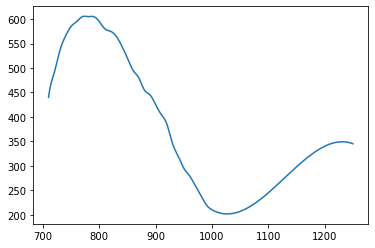

In [63]:
a = plt.plot(config['inp_wvlens'], config['inp_spectrum'][:, 0, :])

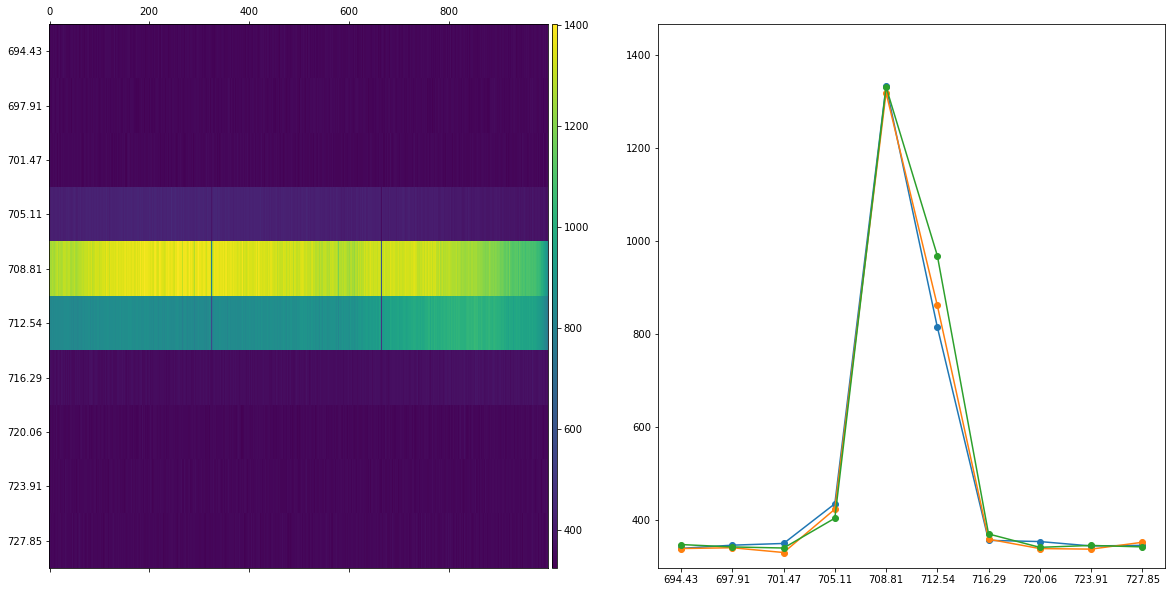

In [48]:
%matplotlib inline
plot_frame(ap, frames, illu_bands=illu_bands, ind=0, channel=3, figsize=(20, 10))

## SRF reconstruction

In [52]:
band_dict, wvl_dict = gather_simulations(frames, illu_bands, config['inp_wvlens'].reshape(-1))

In [56]:
# now band dict has the simulation ordered in band nrs, 
# nr of monochromatic inp_wvl, channel, and xtrack px
band_dict[60][0].shape

(7, 1000)

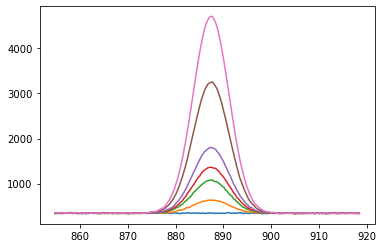

In [57]:
%matplotlib inline
band = 100
xtrack_px = 200

plt.figure()
concat_band = np.concatenate([band_dict[band]], axis=0) # get all the results for band
                                                        # in shape (inp_wvl, channel, xtrack)
for channel in range(frames[0].shape[0]):
    _ = plt.plot(wvl_dict[band], 
                 concat_band[:, channel, xtrack_px])
plt.show()

## Gain calibration

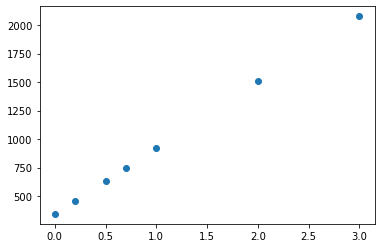

In [78]:
band = 100
plt.scatter(np.array([0.001, 0.2, 0.5, 0.7, 1, 2, 3]), 
            np.concatenate([band_dict[band]], axis=0)[80, :, 500])